# More than Meets the Eye: Student Performance Prediction (Gradient Boosting method vs. ADABoost)



# Objective

Schools have access to large amounts of data on their students, and the potential of this may not be fully harnessed yet. Too often, the picture of student performance is limited and the explanation given to student failures is even more limited. The goal of this project is to use student features that are quite easily accessible by schools to predict whether students will pass or fail a certain subject.

# Highlights
1. GBM gave better test accuracy with 63.23% while ADAboost test accuracy was 62.63%
2. GBM's top predictor was "failures" while ADAboost's was "absences"
3. "absences" may be top predictor for ADAboost because it contributed to more misclassification

# Dataset Description
The dataset used was the “Student performance dataset” from UCI Machine learning repository, collected via questionnaires and school reports in 2014. It contained data on the students math grades (our target variable). Its features ranged from demographics or home conditions, school-related features and social features.

# Feature description
Reference: https://archive.ics.uci.edu/ml/datasets/student+performance#

1. school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
2. sex - student's sex (binary: 'F' - female or 'M' - male)
3. age - student's age (numeric: from 15 to 22)
4. address - student's home address type (binary: 'U' - urban or 'R' - rural)
5. famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
6. Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
7. Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)
8. Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)
9. Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
10. Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
11. reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
12. guardian - student's guardian (nominal: 'mother', 'father' or 'other')
13. traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
14. studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
15. failures - number of past class failures (numeric: n if 1<=n<3, else 4)
16. schoolsup - extra educational support (binary: yes or no)
17. famsup - family educational support (binary: yes or no)
18. paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
19. activities - extra-curricular activities (binary: yes or no)
20. nursery - attended nursery school (binary: yes or no)
21. higher - wants to take higher education (binary: yes or no)
22. internet - Internet access at home (binary: yes or no)
23. romantic - with a romantic relationship (binary: yes or no)
24. famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
25. freetime - free time after school (numeric: from 1 - very low to 5 - very high)
26. goout - going out with friends (numeric: from 1 - very low to 5 - very high)
27. Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
28. Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
29. health - current health status (numeric: from 1 - very bad to 5 - very good)
30. absences - number of school absences (numeric: from 0 to 93)

These will be removed from dataset to gain insight on best predictions without previous grades:

31. G1 - first period grade (numeric: from 0 to 20)
32. G2 - second period grade (numeric: from 0 to 20)
33. G3 - final grade (numeric: from 0 to 20, output target)

# Loading the dataset and Preprocessing

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

import warnings
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)
warnings.filterwarnings("ignore", category=ConvergenceWarning)

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [26]:
df = pd.read_csv('student-mat.csv', sep=';')
dummy = df
print(dummy.shape)
dummy.head()

(395, 33)


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


In [27]:
# assume passing grade is 60%
df['pass'] = np.where(df['G3']< 16, 0, 1)
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,pass
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6,0
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10,0
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15,0
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10,0


In [28]:
# remove G1, G2, G3
df = df.drop(columns=['G1', 'G2', 'G3'])
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,pass
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,0
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,0
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,0
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,0


# Exploratory Data Analytics

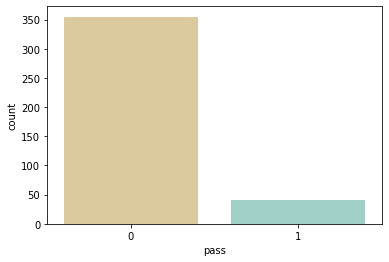

In [29]:
# distribution of target variable
import seaborn as sns
sns.countplot(df['pass'],label="Count", palette='BrBG')
plt.show()

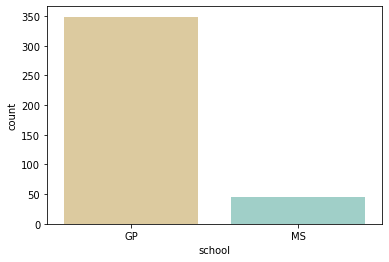

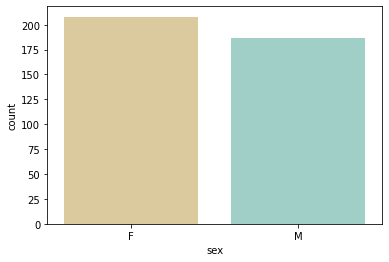

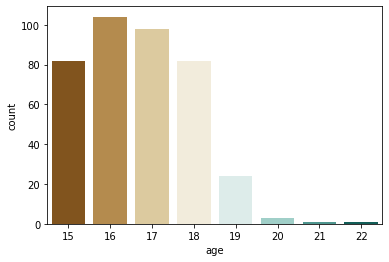

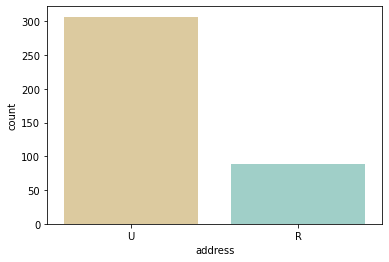

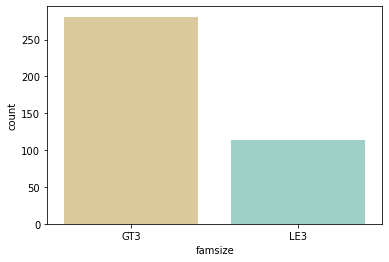

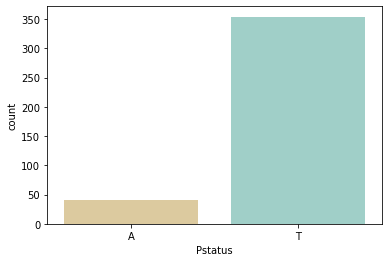

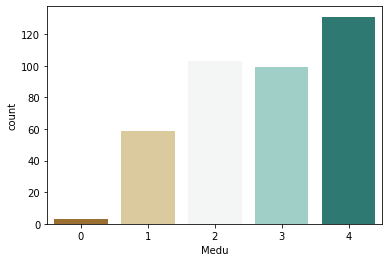

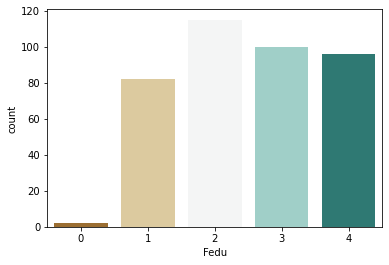

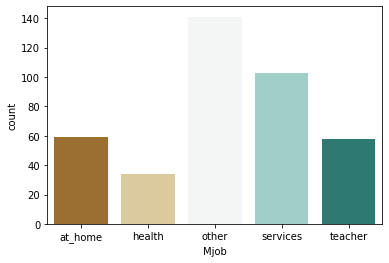

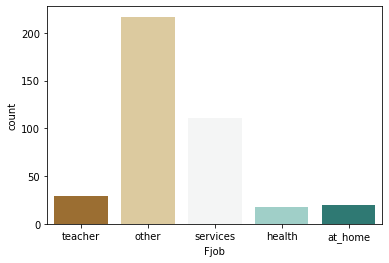

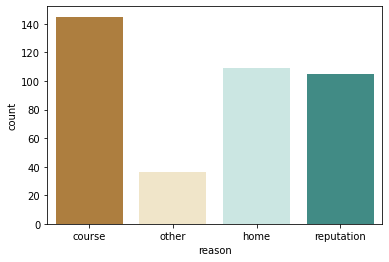

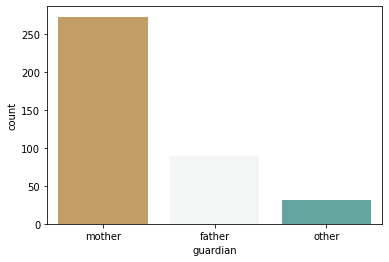

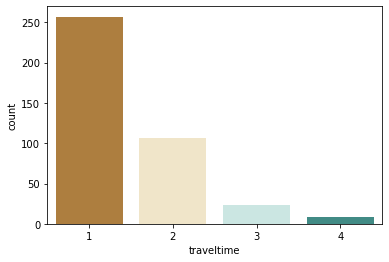

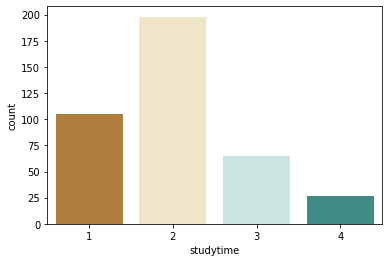

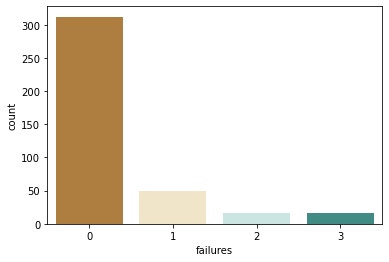

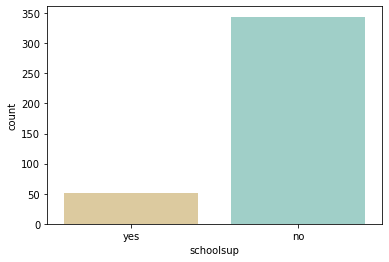

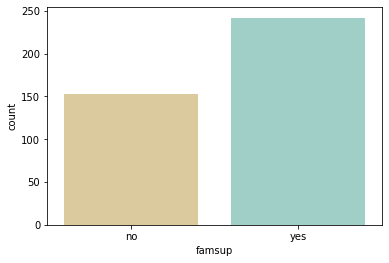

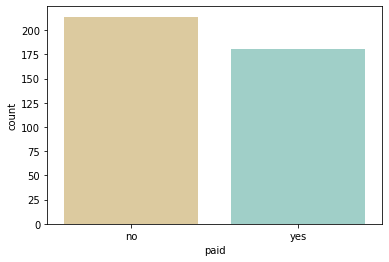

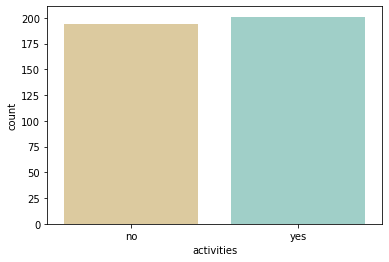

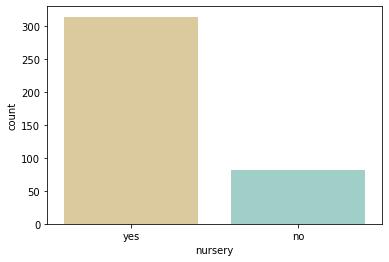

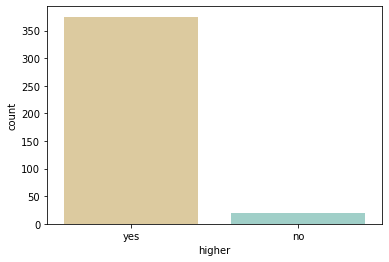

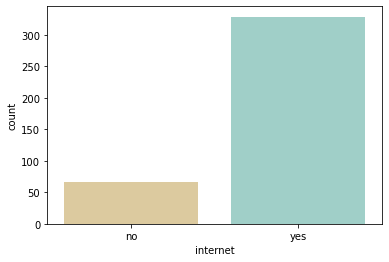

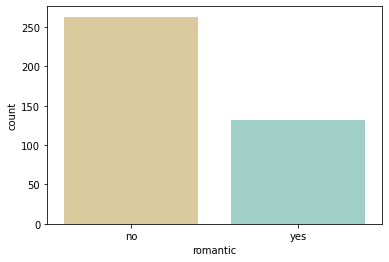

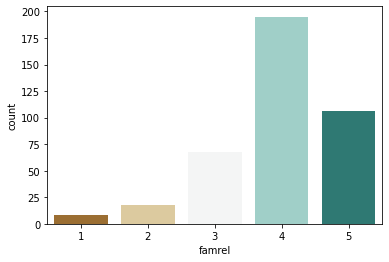

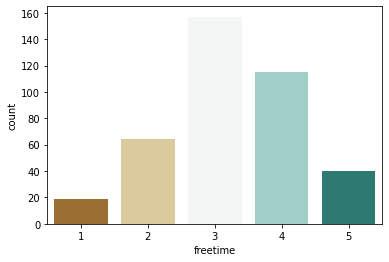

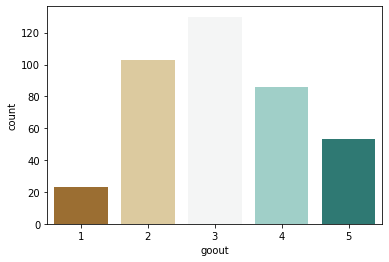

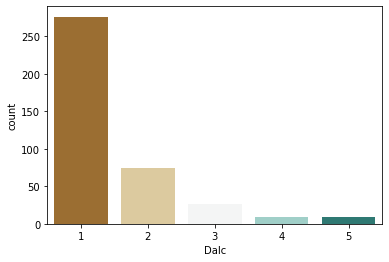

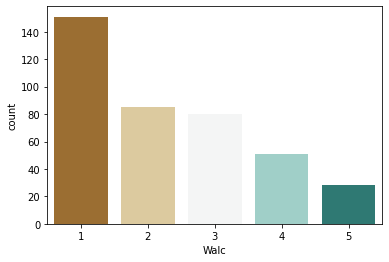

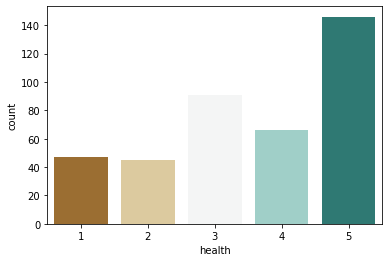

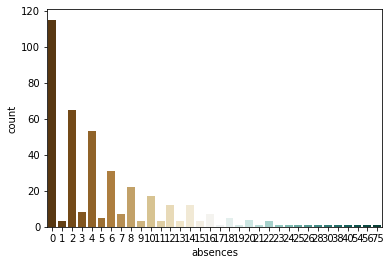

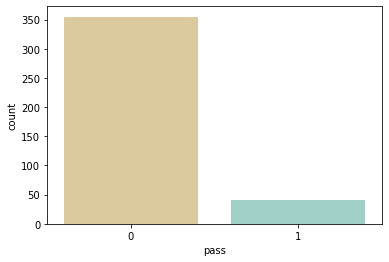

In [30]:
# distribution of each feature
for col in df.columns:
    sns.countplot(df[col],label="Count", palette='BrBG')
    plt.show()

In [31]:
# compute proportion chance criterion
pcc = (df[df['pass']==1].shape[0]/df.shape[0])**2 + (df[df['pass']==0].shape[0]/df.shape[0])**2 

print("Proportion Chance Criterion = {}%".format(100*pcc))
print("1.25*Proportion Chance Criterion = {}%".format(1.25*100*pcc))

Proportion Chance Criterion = 81.7977888158949%
1.25*Proportion Chance Criterion = 102.24723601986862%


# Look at the missing values
There are no null values for this dataset.

In [32]:
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
pass          0
dtype: int64

# One Hot Encode categorical values

In [33]:
# remove target variable
X_clean = df.drop('pass', axis=1)
XX = pd.get_dummies(X_clean)
print(XX.shape)
XX.head()

(395, 56)


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,school_GP,school_MS,sex_F,sex_M,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,Pstatus_T,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other,schoolsup_no,schoolsup_yes,famsup_no,famsup_yes,paid_no,paid_yes,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,1,3,6,1,0,1,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,1,0,1,0,0,1,0,1,1,0,1,0
1,17,1,1,1,2,0,5,3,3,1,1,3,4,1,0,1,0,0,1,1,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,1,0,1,0,1,0,0,1,0,1,1,0
2,15,1,1,1,2,3,4,3,2,2,3,3,10,1,0,1,0,0,1,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0
3,15,4,2,1,3,0,3,2,2,1,1,5,2,1,0,1,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1
4,16,3,3,1,2,0,4,3,2,1,2,5,4,1,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,1,0,0,1,0,1,1,0,1,0


# Apply Scaler

In [10]:
# get column names
XX_column_names = XX.columns

# scale
from sklearn.preprocessing import MinMaxScaler
sscaler = MinMaxScaler()
XX = sscaler.fit_transform(XX.astype(np.float))

# return column names
XX_df = pd.DataFrame(data = XX,columns = XX_column_names)
XX_df.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,school_GP,school_MS,sex_F,sex_M,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,Pstatus_T,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other,schoolsup_no,schoolsup_yes,famsup_no,famsup_yes,paid_no,paid_yes,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,0.428571,1.00,1.00,0.333333,0.333333,0.0,0.75,0.50,0.75,0.00,0.00,0.5,0.080000,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
1,0.285714,0.25,0.25,0.000000,0.333333,0.0,1.00,0.50,0.50,0.00,0.00,0.5,0.053333,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
2,0.000000,0.25,0.25,0.000000,0.333333,1.0,0.75,0.50,0.25,0.25,0.50,0.5,0.133333,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
3,0.000000,1.00,0.50,0.000000,0.666667,0.0,0.50,0.25,0.25,0.00,0.00,1.0,0.026667,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
4,0.142857,0.75,0.75,0.000000,0.333333,0.0,0.75,0.50,0.25,0.00,0.25,1.0,0.053333,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0


# Gradient Boosting Method

Information on the model:
- Weak learner is a shallow decision tree
- Any differentiable loss function can be used -- more flexible
- Uses residuals to identify difficult observations

In [11]:
# get features and target
X = XX_df
y = df['pass']

trial  0 , n_estimators 10
trial  0 , n_estimators 50
trial  0 , n_estimators 100
trial  0 , n_estimators 500
trial  0 , n_estimators 1000
trial  0 , n_estimators 5000
trial  1 , n_estimators 10
trial  1 , n_estimators 50
trial  1 , n_estimators 100
trial  1 , n_estimators 500
trial  1 , n_estimators 1000
trial  1 , n_estimators 5000
trial  2 , n_estimators 10
trial  2 , n_estimators 50
trial  2 , n_estimators 100
trial  2 , n_estimators 500
trial  2 , n_estimators 1000
trial  2 , n_estimators 5000
trial  3 , n_estimators 10
trial  3 , n_estimators 50
trial  3 , n_estimators 100
trial  3 , n_estimators 500
trial  3 , n_estimators 1000
trial  3 , n_estimators 5000
trial  4 , n_estimators 10
trial  4 , n_estimators 50
trial  4 , n_estimators 100
trial  4 , n_estimators 500
trial  4 , n_estimators 1000
trial  4 , n_estimators 5000
trial  5 , n_estimators 10
trial  5 , n_estimators 50
trial  5 , n_estimators 100
trial  5 , n_estimators 500
trial  5 , n_estimators 1000
trial  5 , n_estimato

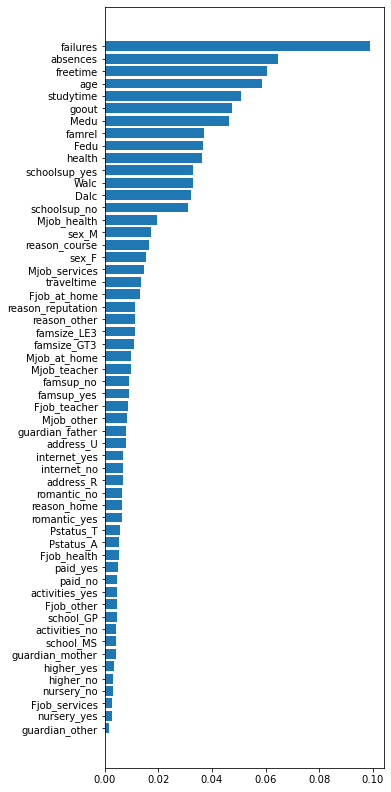

In [12]:
# run the model
Number_trials=20

n_estimators_tuning=[10, 50, 100, 500, 1000, 5000]
score_train = []
score_test = []
weighted_coefs=[]

start_time = time.time()
for seed in range(Number_trials):
    training_accuracy = []  
    test_accuracy = []
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=seed)
    for n_estimators_run in n_estimators_tuning:
        print('trial ', seed, ', n_estimators', n_estimators_run)
        gbc = GradientBoostingClassifier(n_estimators=n_estimators_run,max_depth=3, max_features=0.8)
        gbc.fit(X_train, y_train)
        training_accuracy.append(gbc.score(X_train, y_train))
        test_accuracy.append(gbc.score(X_test, y_test))

        coefs = gbc.feature_importances_
        # appends every time a new model is made
        weighted_coefs.append(coefs)

    score_train.append(training_accuracy)
    score_test.append(test_accuracy)

# get the mean of the weighted coefficients over all the trials
mean_coefs=np.mean(weighted_coefs, axis=0)        
# score : list of mean score of each hyperparameter, across all trials
score = np.mean(score_test, axis=0)

top_predictor=X.columns[np.argmax(np.abs(mean_coefs))]
abs_mean_coefs = np.abs(mean_coefs[:])
coefs_count = len(abs_mean_coefs)

fig, ax = plt.subplots(figsize=(5,14))
ax.barh(np.arange(coefs_count), sorted(abs_mean_coefs))
ax.set_yticks(np.arange(coefs_count))
ax.set_yticklabels(X.columns[np.argsort(abs_mean_coefs)])

run_time = (time.time() - start_time)

In [13]:
# store results
results_gbm = [
    'Gradient Boosting Method', np.amax(score),
    'n_estimators = {0}'.format(n_estimators_tuning[np.argmax(score)]),
    top_predictor,run_time]

print(results_gbm)

['Gradient Boosting Method', 0.6323232323232324, 'n_estimators = 1000', 'failures', 128.75298619270325]


# ADABoost
Information on the model:
- weak learner is a decision stump
- exponential loss function
- assigns weights to observations and to each new classifier -- more interpretable

trial  0 , n_estimators 10
trial  0 , n_estimators 50
trial  0 , n_estimators 100
trial  0 , n_estimators 500
trial  0 , n_estimators 1000
trial  0 , n_estimators 5000
trial  1 , n_estimators 10
trial  1 , n_estimators 50
trial  1 , n_estimators 100
trial  1 , n_estimators 500
trial  1 , n_estimators 1000
trial  1 , n_estimators 5000
trial  2 , n_estimators 10
trial  2 , n_estimators 50
trial  2 , n_estimators 100
trial  2 , n_estimators 500
trial  2 , n_estimators 1000
trial  2 , n_estimators 5000
trial  3 , n_estimators 10
trial  3 , n_estimators 50
trial  3 , n_estimators 100
trial  3 , n_estimators 500
trial  3 , n_estimators 1000
trial  3 , n_estimators 5000
trial  4 , n_estimators 10
trial  4 , n_estimators 50
trial  4 , n_estimators 100
trial  4 , n_estimators 500
trial  4 , n_estimators 1000
trial  4 , n_estimators 5000
trial  5 , n_estimators 10
trial  5 , n_estimators 50
trial  5 , n_estimators 100
trial  5 , n_estimators 500
trial  5 , n_estimators 1000
trial  5 , n_estimato

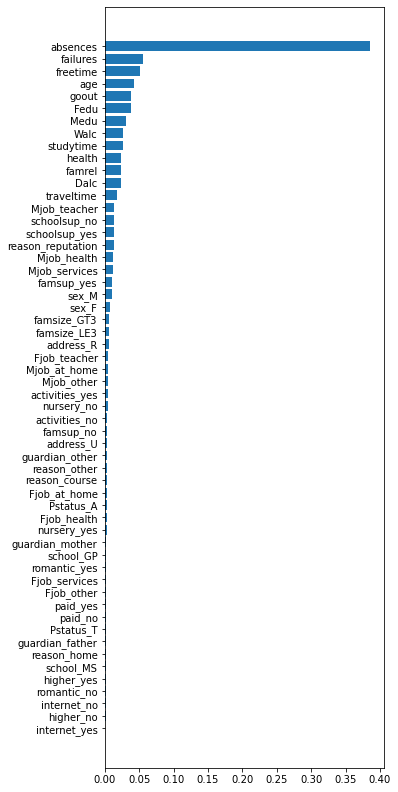

In [14]:
# run the model
n_estimators_tuning=[10, 50, 100, 500, 1000, 5000]
score_train = []
score_test = []
weighted_coefs=[]

start_time = time.time()
for seed in range(Number_trials):
    training_accuracy = []  
    test_accuracy = []
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=seed)
    for n_estimators_run in n_estimators_tuning:
        print('trial ', seed, ', n_estimators', n_estimators_run)
        ada = AdaBoostClassifier(n_estimators=n_estimators_run)
        ada.fit(X_train, y_train)
        training_accuracy.append(ada.score(X_train, y_train))
        test_accuracy.append(ada.score(X_test, y_test))

        coefs = ada.feature_importances_
        # appends every time a new model is made
        weighted_coefs.append(coefs)

    score_train.append(training_accuracy)
    score_test.append(test_accuracy)

# get the mean of the weighted coefficients over all the trials
mean_coefs=np.mean(weighted_coefs, axis=0)        
# score : list of mean score of each hyperparameter, across all trials
score = np.mean(score_test, axis=0)

top_predictor=X.columns[np.argmax(np.abs(mean_coefs))]
abs_mean_coefs = np.abs(mean_coefs[:])
coefs_count = len(abs_mean_coefs)

fig, ax = plt.subplots(figsize=(5,14))
ax.barh(np.arange(coefs_count), sorted(abs_mean_coefs))
ax.set_yticks(np.arange(coefs_count))
ax.set_yticklabels(X.columns[np.argsort(abs_mean_coefs)])

run_time = (time.time() - start_time)

In [15]:
# store results
results_ada = [
    'Adaptive Boosting Method', np.amax(score),
    'n_estimators = {0}'.format(n_estimators_tuning[np.argmax(score)]),
    top_predictor,run_time]

print(results_ada)

['Adaptive Boosting Method', 0.6262626262626262, 'n_estimators = 50', 'absences', 258.8711199760437]


# Results and Discussion

In [16]:
cols = ['Machine Learning Method', 'Test Accuracy', 'Best Parameter', 'Top Predictor Variable', 'Run Time']
df2 = pd.DataFrame(columns=cols)

df2.loc[0] = results_gbm
df2.loc[1] = results_ada

df2

,Machine Learning Method,Test Accuracy,Best Parameter,Top Predictor Variable,Run Time
0,Gradient Boosting Method,0.632323,n_estimators = 1000,failures,128.752986
1,Adaptive Boosting Method,0.626263,n_estimators = 50,absences,258.871120


As shown above, GBM gave the better test accuracy, although neither model exceeded the 1.25 X PCC required. GBM was faster, and both models did not select the highest n_estimator value, which was 5000. Interestingly, GBM chose number of failures as its top predictor, but ADAboost chose number of absences. 

# Post-EDA: Inspecting why absences was chosen as top predictor for ADA

In [33]:
# instantiate model with the optimal hyperparameter
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)
ada = AdaBoostClassifier(n_estimators=100)
ada.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=100)

In [34]:
# collect predictions for each iteration
staged_predicts = []
for i in ada.staged_predict(X):
    staged_predicts.append(i)
    
# get number of misclassified points for each ensemble iteration
actuals = np.array(y)
i = 1
for staged_predict in staged_predicts:
    misclassified_pts = np.where(staged_predict!=actuals)[0]
    print(f'iteration {i} misclassified points: ', len(misclassified_pts))
    i +=1
    
print('number of iterations: ', len(staged_predicts))
print('number of predictions', len(staged_predicts[0]))

iteration 1 misclassified points:  180
iteration 2 misclassified points:  156
iteration 3 misclassified points:  153
iteration 4 misclassified points:  153
iteration 5 misclassified points:  136
iteration 6 misclassified points:  149
iteration 7 misclassified points:  124
iteration 8 misclassified points:  132
iteration 9 misclassified points:  122
iteration 10 misclassified points:  124
iteration 11 misclassified points:  125
iteration 12 misclassified points:  122
iteration 13 misclassified points:  124
iteration 14 misclassified points:  123
iteration 15 misclassified points:  124
iteration 16 misclassified points:  117
iteration 17 misclassified points:  120
iteration 18 misclassified points:  113
iteration 19 misclassified points:  107
iteration 20 misclassified points:  108
iteration 21 misclassified points:  108
iteration 22 misclassified points:  107
iteration 23 misclassified points:  115
iteration 24 misclassified points:  111
iteration 25 misclassified points:  112
iteration

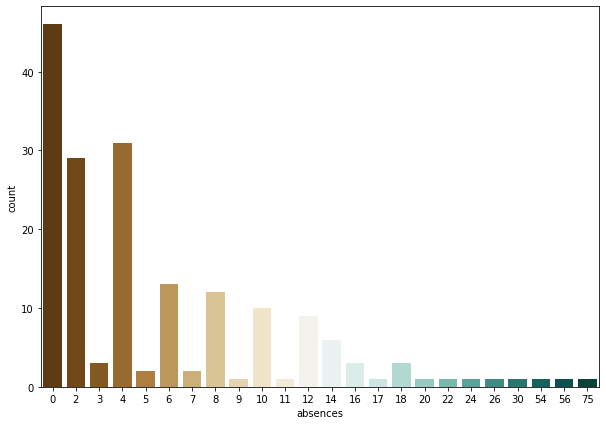

In [35]:
# get the stage with the worst predictions
preds = staged_predicts[0]

# inspect distribution of "absences" feature
idxs_misclassified = list(np.where(preds!=actuals)[0])
absences_misclassified = df['absences'].filter(items=idxs_misclassified)
fig, ax = plt.subplots(figsize=(10,7))
sns.countplot(absences_misclassified,label="Count", palette='BrBG')
plt.show()

Using the ADAboost method staged_predict(), we can actually access the ensemble prediction for each iteration, find misclassified points, and see what their distribution is for the “absences” feature. Apparently there are many students with 0 absences, and it also has more values compared to the other features. This may have contributed to more chances of misclassification, and shows the importance of misclassification in the ADAboost design.

# Conclusion

1. GBM had a higher accuracy possibly because it performs better with data that is not “well behaved”, we can see that the distribution of data is not very balanced for some features. The accuracies of both models can be also be improved by feature engineering or more hyperparameter tuning possibly using gridsearch.

2. Despite the accuracies of the models, the top predictors can shed light on what teachers can look out for when monitoring students and their performance. By being more aware of these, teachers may be able to step in and help out students before it is too late.

# Acknowledgements
I would like to thank prof Chris Monterola, prof Leo Lorenzo, the ML 1 mentors, and my classmates for all their help in this project and my machine learning journey.



# References
https://archive.ics.uci.edu/ml/datasets/student+performance

https://www.youtube.com/watch?v=3CC4N4z3GJc&t=319s

https://www.youtube.com/watch?v=LsK-xG1cLYA

https://towardsdatascience.com/how-to-select-between-boosting-algorithm-e8d1b15924f7

https://www.analyticsvidhya.com/blog/2021/03/introduction-to-adaboost-algorithm-with-python-implementation/

https://educationalresearchtechniques.com/2019/01/02/adaboost-classification-in-python/

https://medium.com/@chaudhurysrijani/tuning-of-adaboost-with-computational-complexity-8727d01a9d20

https://www.analyticsvidhya.com/blog/2020/10/adaboost-and-gradient-boost-comparitive-study-between-2-popular-ensemble-model-techniques/

https://analyticsindiamag.com/adaboost-vs-gradient-boosting-a-comparison-of-leading-boosting-algorithms/